In [1]:
# Cargar múdulos necesarios
import numpy as np
import pandas as pd
# para graficas
import seaborn as sns
# para graficas
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('iris') # Tabla de datos
data.head(5) # mostramos los primeros 5 datos de la tabla

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Resumend de datos / analisis descriptivo / variables tipo cuantitativo
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.groupby('species').size() # en el estudio hay 50 muestras de cada uno

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 19) # ingresamos los datos y cuando % queremos para entreno y despues para que informacion queremos la info, en este caso las especias, y metemos una semilla para obtener los mismos datos
train.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
68,6.2,2.2,4.5,1.5,versicolor
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
108,6.7,2.5,5.8,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
118,7.7,2.6,6.9,2.3,virginica


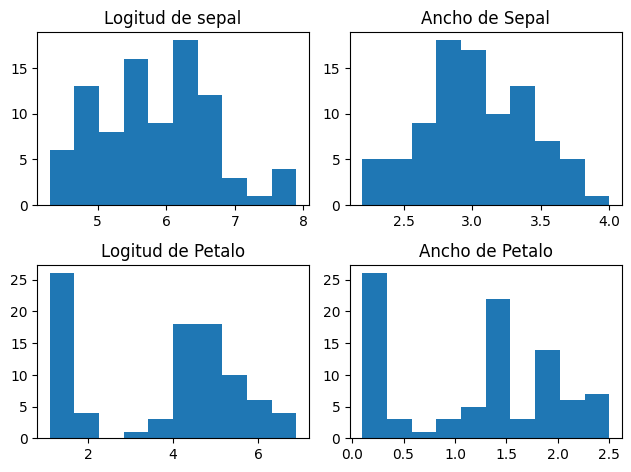

In [7]:
n_bins = 10
fig, axs = plt.subplots(2,2) # generamos el grafico de 2x2 donde se va a mostrar caracteristicas de cada una de las variables
axs[0,0].hist(train['sepal_length'], bins=n_bins)
axs[0,0].set_title("Logitud de sepal")

axs[0,1].hist(train['sepal_width'], bins=n_bins)
axs[0,1].set_title("Ancho de Sepal")

axs[1,0].hist(train['petal_length'], bins=n_bins)
axs[1,0].set_title("Logitud de Petalo")

axs[1,1].hist(train['petal_width'], bins=n_bins)
axs[1,1].set_title("Ancho de Petalo")

fig.tight_layout(pad=1.0)

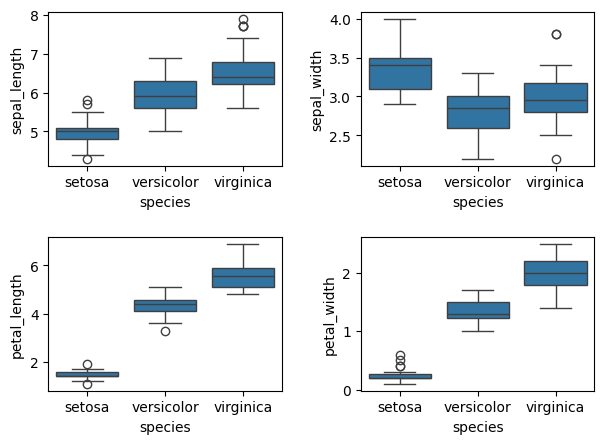

In [8]:
fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = ['setosa', 'versicolor', 'virginica']

fig, axs = plt.subplots(2,2) # creamos contendores

sns.boxplot(x = 'species', y = fn[0], data=train, order=cn, ax=axs[0,0])
sns.boxplot(x = 'species', y = fn[1], data=train, order=cn, ax=axs[0,1])
sns.boxplot(x = 'species', y = fn[2], data=train, order=cn, ax=axs[1,0])
sns.boxplot(x = 'species', y = fn[3], data=train, order=cn, ax=axs[1,1])

fig.tight_layout(pad=2.0)

C:\Users\pca20\AppData\Local\Temp\ipykernel_18608\1838425294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=fn[2], data=train, order=cn, palette='Spectral')


<Axes: xlabel='species', ylabel='petal_length'>

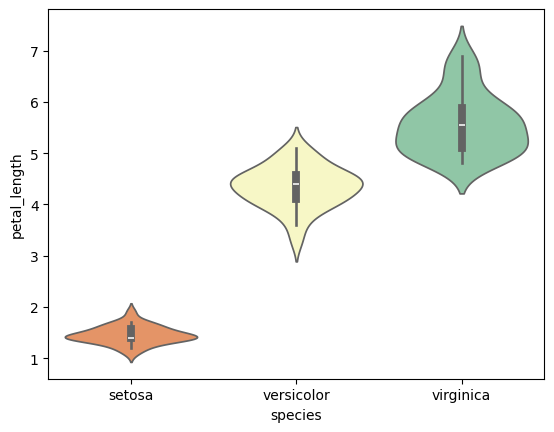

In [9]:
sns.violinplot(x='species', y=fn[2], data=train, order=cn, palette='Spectral')

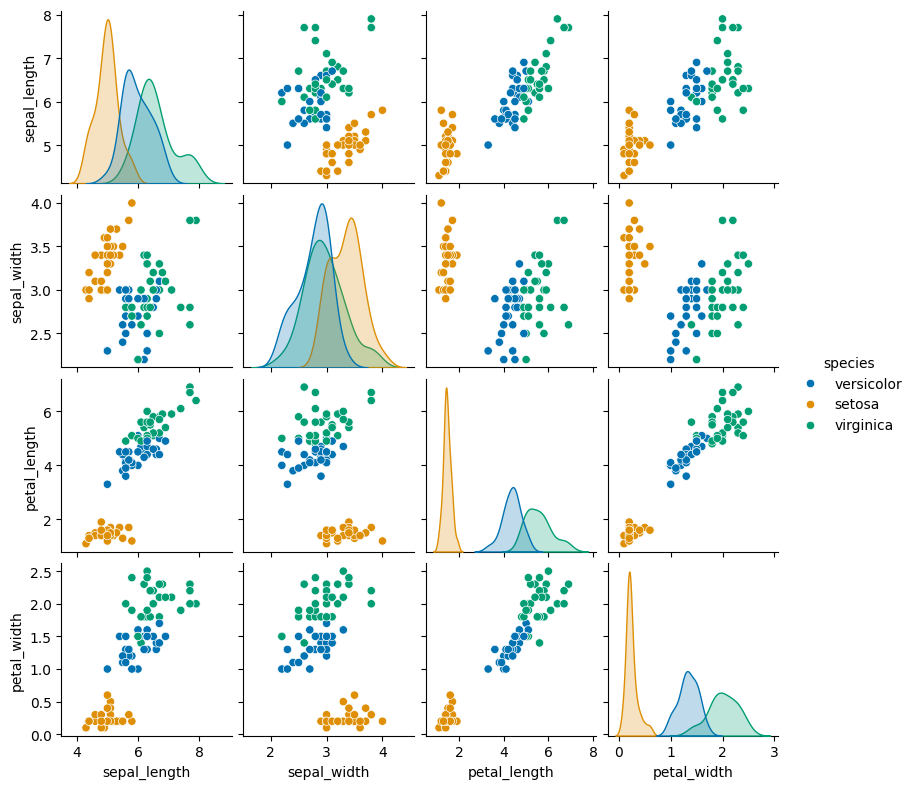

In [10]:
sns.pairplot(train, hue='species', height =2, palette = 'colorblind')

In [11]:
# Separación es entre objetivo y explicativas de cada grupo
# Variable objetivo seria las especies, y las explicaticas setian el ancho de tallo, petalo y esas cosas

# GRUPO DE ENTRENAMIENTO 
x_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # variables explicativas
y_train = train['species'] # variables objetivo

# GRUPO DE PRUEBAS
x_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # variables explicativas
y_test = test['species'] # variables objetivo

print(x_train.head(5))
print(x_train.head(5))

     sepal_length  sepal_width  petal_length  petal_width
68            6.2          2.2           4.5          1.5
0             5.1          3.5           1.4          0.2
27            5.2          3.5           1.5          0.2
8             4.4          2.9           1.4          0.2
108           6.7          2.5           5.8          1.8
     sepal_length  sepal_width  petal_length  petal_width
68            6.2          2.2           4.5          1.5
0             5.1          3.5           1.4          0.2
27            5.2          3.5           1.5          0.2
8             4.4          2.9           1.4          0.2
108           6.7          2.5           5.8          1.8


In [12]:
# Cargar bibliotecas específicas
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [13]:
# Creación del modelo del árbol de decisión
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1,)
mod_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(0.4, 0.875, 'petal_width <= 0.8\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal_width <= 1.75\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(0.4, 0.375, 'petal_length <= 4.95\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]\nclass = virginica')]

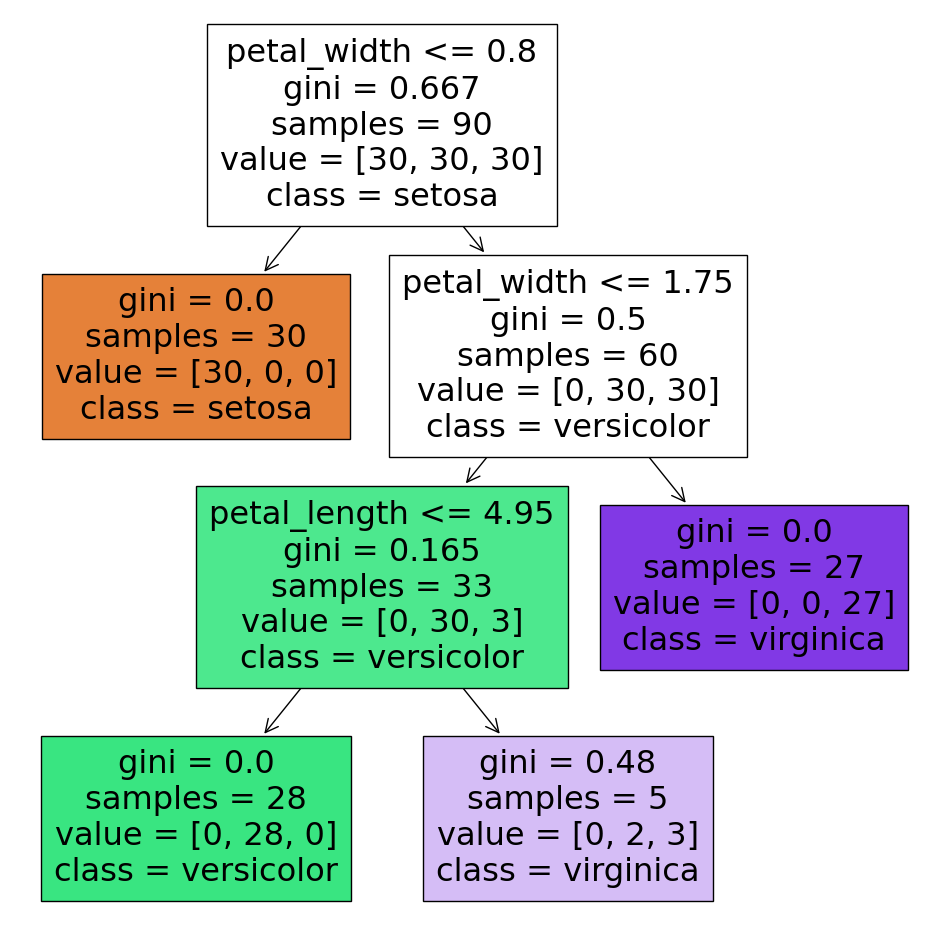

In [14]:
plt.figure(figsize=(12,12))
plot_tree(mod_dt, feature_names=mod_dt.feature_names_in_, class_names=cn, filled=True)

# Verificación del modelo

In [15]:
# Precedir resultados utilizando el modelo
prediccion = mod_dt.predict(x_test)

In [16]:
# Modulo para métricas de eficiencia del modelo
from sklearn import metrics

In [17]:
print('La precisión del árbol de decisicón es: {:.3f}'.format(metrics.accuracy_score(prediccion, y_test)))

La precisión del árbol de decisicón es: 0.967


In [18]:
# Importancia de cada predictor
mod_dt.feature_importances_

array([0.       , 0.       , 0.0530303, 0.9469697])

In [36]:
importancia_dt = pd.DataFrame({'Importancia': mod_dt.feature_importances_, 'Característica': mod_dt.feature_names_in_})
importancia_dt

,Importancia,Característica
0,0.00000,sepal_length
1,0.00000,sepal_width
2,0.05303,petal_length
3,0.94697,petal_width
